In [88]:
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split as split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

In [89]:
df = pd.read_csv(r"/content/Assignment Datasheet.csv")
df.head()

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
0,ASEAN (Ember),2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
1,ASEAN (Ember),2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
2,ASEAN (Ember),2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
3,ASEAN (Ember),2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
4,ASEAN (Ember),2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN


In [90]:
# Replace NaN values with the mean for each column
for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):  # Check if the column is numeric
        df[col] = df[col].fillna(df[col].mean())
df.head()

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
0,ASEAN (Ember),2000,NaN,1.053096e+08,3.585114e+11,46.091694,2.719074,133.558459,38.068209,64.7168,...,0.0,0.210395,267.541206,7.314174,53.422938,62.811828,0.0,232.108949,0.0,0.651413
1,ASEAN (Ember),2001,NaN,1.053096e+08,3.585114e+11,46.091694,2.719074,133.558459,38.068209,64.7168,...,0.0,0.210395,267.541206,7.314174,53.422938,62.811828,0.0,232.108949,0.0,0.651413
2,ASEAN (Ember),2002,NaN,1.053096e+08,3.585114e+11,46.091694,2.719074,133.558459,38.068209,64.7168,...,0.0,0.210395,267.541206,7.314174,53.422938,62.811828,0.0,232.108949,0.0,0.651413
3,ASEAN (Ember),2003,NaN,1.053096e+08,3.585114e+11,46.091694,2.719074,133.558459,38.068209,64.7168,...,0.0,0.210395,267.541206,7.314174,53.422938,62.811828,0.0,232.108949,0.0,0.651413
4,ASEAN (Ember),2004,NaN,1.053096e+08,3.585114e+11,46.091694,2.719074,133.558459,38.068209,64.7168,...,0.0,0.210395,267.541206,7.314174,53.422938,62.811828,0.0,232.108949,0.0,0.651413


In [91]:
df.isna().sum()

,0
country,0
year,0
iso_code,5500
population,0
gdp,0
...,...
wind_elec_per_capita,0
wind_electricity,0
wind_energy_per_capita,0
wind_share_elec,0


In [92]:
df = df.drop_duplicates()
df = df.dropna(axis=1, how='all') #Remove Columns with All Empty Data
df = df.dropna(how='all') #Remove Rows with All Empty Data
df = df.drop(columns=['iso_code'])
df = df.drop(columns=['biofuel_cons_change_pct','biofuel_cons_change_twh','biofuel_share_elec','biofuel_share_energy','biofuel_elec_per_capita','biofuel_cons_per_capita'])
df = df.drop(columns=['coal_cons_change_pct','coal_cons_change_twh','coal_cons_per_capita','coal_prod_change_pct','coal_prod_change_twh','coal_prod_per_capita','coal_elec_per_capita','coal_share_elec','coal_share_energy'])
df = df.drop(columns=['electricity_demand','electricity_generation','electricity_share_energy'])
df = df.drop(columns=['gas_cons_change_pct','gas_cons_change_twh','gas_prod_change_pct','gas_prod_change_twh','gas_share_elec','gas_share_energy','gas_elec_per_capita','gas_energy_per_capita','gas_prod_per_capita'])
df = df.drop(columns=['hydro_cons_change_pct','hydro_cons_change_twh','hydro_elec_per_capita','hydro_energy_per_capita','hydro_share_elec','hydro_share_energy'])
df = df.drop(columns=['nuclear_cons_change_pct','nuclear_cons_change_twh','nuclear_share_elec','nuclear_share_energy','nuclear_elec_per_capita','nuclear_energy_per_capita'])
df = df.drop(columns=['oil_cons_change_pct','oil_cons_change_twh','oil_prod_change_pct','oil_prod_change_twh','oil_share_elec','oil_share_energy','oil_elec_per_capita','oil_energy_per_capita','oil_prod_per_capita'])
df = df.drop(columns=['other_renewables_cons_change_pct','other_renewables_cons_change_twh','other_renewables_share_elec','other_renewables_share_energy','other_renewables_elec_per_capita_exc_biofuel','other_renewables_share_elec_exc_biofuel','other_renewables_elec_per_capita','other_renewables_energy_per_capita','other_renewable_exc_biofuel_electricity'])
df = df.drop(columns=['renewables_cons_change_pct','renewables_cons_change_twh','renewables_share_elec','renewables_share_energy','renewables_elec_per_capita','renewables_energy_per_capita'])
df = df.drop(columns=['solar_cons_change_pct','solar_cons_change_twh','solar_elec_per_capita','solar_share_elec','solar_share_energy','solar_energy_per_capita'])
df = df.drop(columns=['wind_cons_change_pct','wind_cons_change_twh','wind_elec_per_capita','wind_share_elec','wind_energy_per_capita','wind_share_energy'])
df = df.drop(columns=['fossil_share_energy','fossil_share_elec','fossil_cons_change_pct','fossil_cons_change_twh','fossil_elec_per_capita','fossil_energy_per_capita'])
df = df.drop(columns=['energy_cons_change_pct','energy_cons_change_twh'])
df = df.drop(columns=['low_carbon_cons_change_pct','low_carbon_cons_change_twh','low_carbon_share_elec','low_carbon_elec_per_capita','low_carbon_energy_per_capita','low_carbon_share_energy'])
df = df.drop(columns=['net_elec_imports','net_elec_imports_share_demand'])
df = df.drop(columns=['energy_per_capita','energy_per_gdp'])
df = df.drop(columns=['per_capita_electricity'])
df = df.drop(columns=['carbon_intensity_elec'])
df = df.drop(columns=['greenhouse_gas_emissions'])
df = df.drop(df.index[0:23])

In [93]:
df

,country,year,population,gdp,biofuel_consumption,biofuel_electricity,coal_consumption,coal_electricity,coal_production,fossil_electricity,...,oil_production,other_renewable_consumption,other_renewable_electricity,primary_energy_consumption,renewables_consumption,renewables_electricity,solar_consumption,solar_electricity,wind_consumption,wind_electricity
23,Afghanistan,1900,4707744.0,3.585114e+11,38.068209,10.966685,1880.502099,325.682578,0.000,538.246426,...,1227.628911,48.543148,13.485538,4510.825629,572.144778,166.945462,21.547749,7.016748,53.422938,17.561153
24,Afghanistan,1901,4751177.0,3.585114e+11,38.068209,10.966685,1880.502099,325.682578,0.000,538.246426,...,1227.628911,48.543148,13.485538,4510.825629,572.144778,166.945462,21.547749,7.016748,53.422938,17.561153
25,Afghanistan,1902,4802500.0,3.585114e+11,38.068209,10.966685,1880.502099,325.682578,0.000,538.246426,...,1227.628911,48.543148,13.485538,4510.825629,572.144778,166.945462,21.547749,7.016748,53.422938,17.561153
26,Afghanistan,1903,4861833.0,3.585114e+11,38.068209,10.966685,1880.502099,325.682578,0.000,538.246426,...,1227.628911,48.543148,13.485538,4510.825629,572.144778,166.945462,21.547749,7.016748,53.422938,17.561153
27,Afghanistan,1904,4921891.0,3.585114e+11,38.068209,10.966685,1880.502099,325.682578,0.000,538.246426,...,1227.628911,48.543148,13.485538,4510.825629,572.144778,166.945462,21.547749,7.016748,53.422938,17.561153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22007,Zimbabwe,2018,15052191.0,2.271535e+10,38.068209,0.390000,1880.502099,3.690000,25.105,3.730000,...,1227.628911,48.543148,0.390000,51.809000,572.144778,5.460000,21.547749,0.020000,53.422938,0.000000
22008,Zimbabwe,2019,15354606.0,3.585114e+11,38.068209,0.380000,1880.502099,3.620000,19.700,3.660000,...,1227.628911,48.543148,0.380000,46.120000,572.144778,4.580000,21.547749,0.030000,53.422938,0.000000
22009,Zimbabwe,2020,15669663.0,3.585114e+11,38.068209,0.350000,1880.502099,3.360000,20.292,3.400000,...,1227.628911,48.543148,0.350000,41.997000,572.144778,4.190000,21.547749,0.030000,53.422938,0.000000
22010,Zimbabwe,2021,15993525.0,3.585114e+11,38.068209,0.380000,1880.502099,3.570000,24.291,3.610000,...,1227.628911,48.543148,0.380000,42.145000,572.144778,4.420000,21.547749,0.040000,53.422938,0.000000


In [94]:
df.isna().sum()

,0
country,0
year,0
population,0
gdp,0
biofuel_consumption,0
biofuel_electricity,0
coal_consumption,0
coal_electricity,0
coal_production,0
fossil_electricity,0


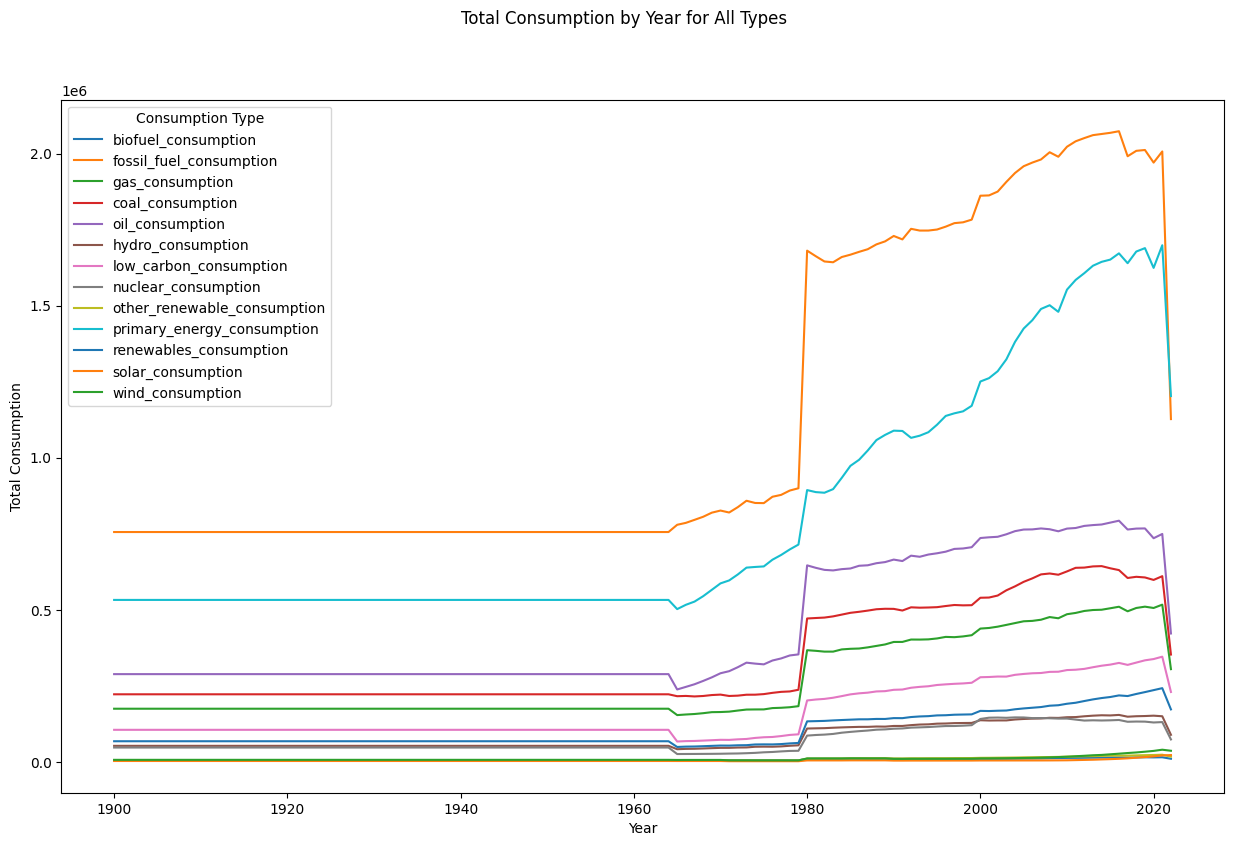

In [95]:
# Select only the columns related to consumption
consumption_columns = ['biofuel_consumption','fossil_fuel_consumption', 'gas_consumption','coal_consumption', 'oil_consumption','hydro_consumption','low_carbon_consumption'
                      ,'nuclear_consumption','other_renewable_consumption','primary_energy_consumption','renewables_consumption','solar_consumption','wind_consumption']


# Group by 'Year' and sum all consumption-related columns
yearly_consumption = df.groupby('year')[consumption_columns].sum()

# Plot the data
fig, ax = plt.subplots(figsize=(15, 9))
fig.suptitle('Total Consumption by Year for All Types')

# Plot each type of Consumption
yearly_consumption.plot(ax=ax)

# Set axis labels and legend
ax.set_ylabel('Total Consumption')
ax.set_xlabel('Year')
ax.legend(title="Consumption Type")

# Show the plot
plt.show()

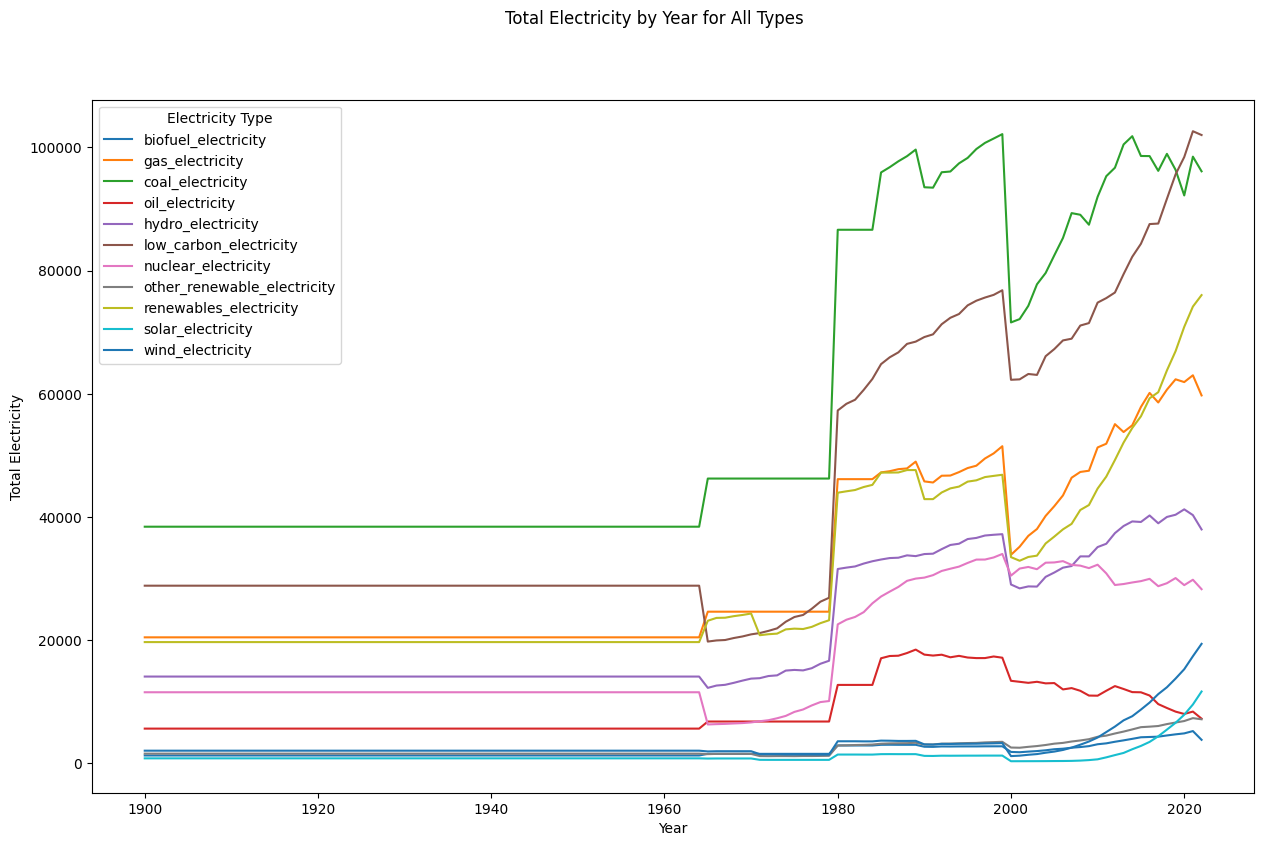

In [96]:
# Select only the columns related to Electricity
electricity_columns = ['biofuel_electricity','gas_electricity','coal_electricity', 'oil_electricity','hydro_electricity','low_carbon_electricity'
                      ,'nuclear_electricity','other_renewable_electricity','renewables_electricity','solar_electricity','wind_electricity']


# Group by 'Year' and sum all electricity-related columns
yearly_electricity = df.groupby('year')[electricity_columns].sum()

# Plot the data
fig, ax = plt.subplots(figsize=(15, 9))
fig.suptitle('Total Electricity by Year for All Types')

# Plot each type of electricity
yearly_electricity.plot(ax=ax)

# Set axis labels and legend
ax.set_ylabel('Total Electricity')
ax.set_xlabel('Year')
ax.legend(title="Electricity Type")

# Show the plot
plt.show()

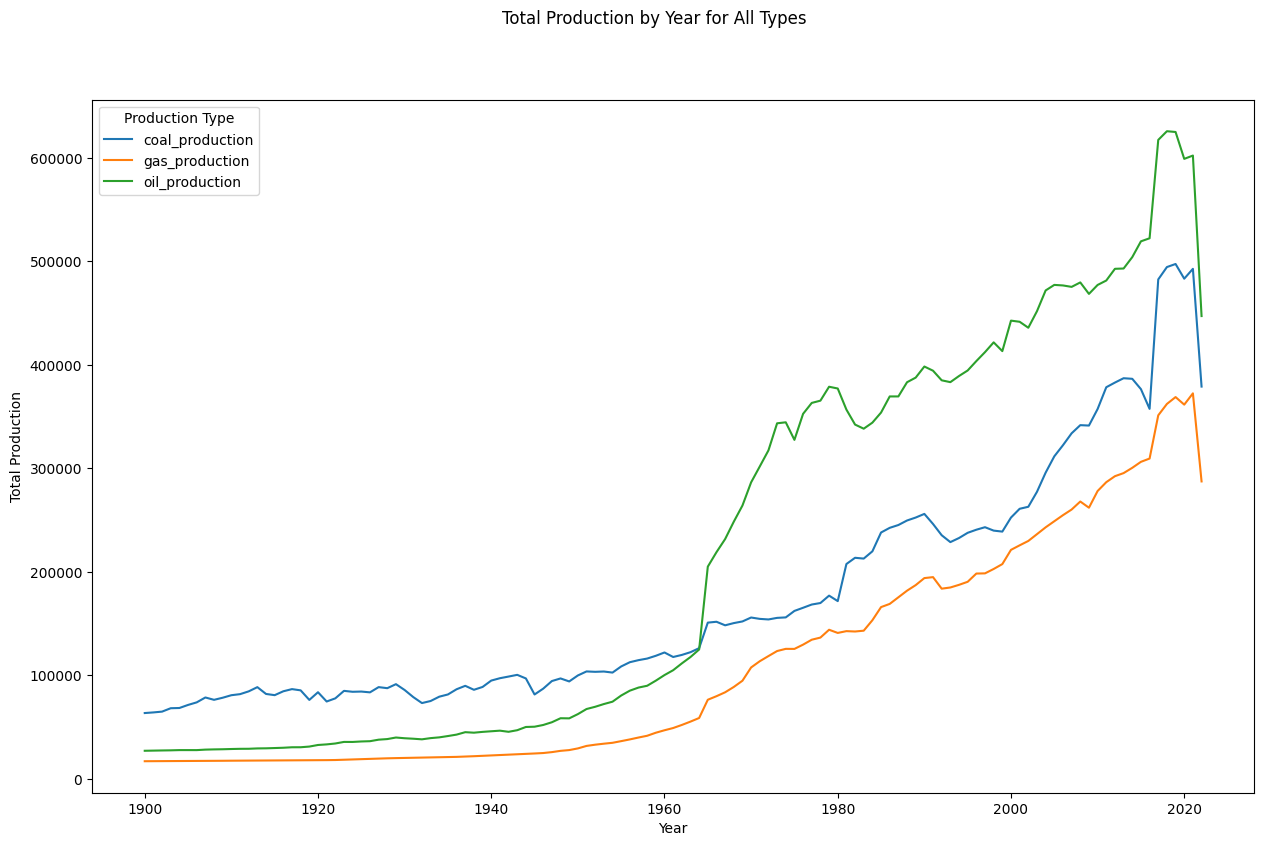

In [97]:
# Select only the columns related to production
production_columns = ['coal_production', 'gas_production', 'oil_production',]


# Group by 'Year' and sum all production-related columns
yearly_production = df.groupby('year')[production_columns].sum()

# Plot the data
fig, ax = plt.subplots(figsize=(15, 9))
fig.suptitle('Total Production by Year for All Types')

# Plot each type of production
yearly_production.plot(ax=ax)

# Set axis labels and legend
ax.set_ylabel('Total Production')
ax.set_xlabel('Year')
ax.legend(title="Production Type")

# Show the plot
plt.show()

In [98]:
# Define features (X) and target (y)
# Select only numeric features
X = df.select_dtypes(include=['number']).drop(columns=['biofuel_consumption','biofuel_electricity','coal_consumption','coal_electricity',
'coal_production','fossil_electricity','fossil_fuel_consumption','gas_consumption',
'gas_electricity','gas_production','hydro_consumption','hydro_electricity',
'low_carbon_consumption','low_carbon_electricity','nuclear_consumption','nuclear_electricity',
'oil_consumption','oil_electricity','oil_production','other_renewable_consumption',
'other_renewable_electricity','primary_energy_consumption','renewables_consumption','renewables_electricity',
'solar_consumption','solar_electricity','wind_consumption','wind_electricity'])


y = df[['biofuel_consumption','biofuel_electricity','coal_consumption','coal_electricity',
'coal_production','fossil_electricity','fossil_fuel_consumption','gas_consumption',
'gas_electricity','gas_production','hydro_consumption','hydro_electricity',
'low_carbon_consumption','low_carbon_electricity','nuclear_consumption','nuclear_electricity',
'oil_consumption','oil_electricity','oil_production','other_renewable_consumption',
'other_renewable_electricity','primary_energy_consumption','renewables_consumption','renewables_electricity',
'solar_consumption','solar_electricity','wind_consumption','wind_electricity',]]


In [99]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = split(X, y, test_size=0.2, random_state=42)

In [100]:
#Feature scaling for StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X.shape

(21989, 3)

In [109]:
# Silhouette scores for KMeans using StandardScaler
print("Silhouette scores for StandardScaler:")
sscores_standard = []
for k in range(2, 11):
    km = KMeans(n_clusters=k, n_init=10).fit(X_train_scaled)
    score = silhouette_score(X_train_scaled, km.labels_)
    sscores_standard.append(score)
    print(f"k={k}, silhouette score={score:.3f}")

# k-NN Regressor for StandardScaler
print("\nKNN Regression with StandardScaler:")
for k in range(1,11):
  knn1 = KNeighborsRegressor(n_neighbors=k).fit(X_train_scaled, y_train)
  print(f"KNN k={k}:R2={knn1.score(X_test_scaled, y_test):.3f}")

# Ridge Regression with StandardScaler
print("\nRidge Regression with StandardScaler:")
for x in range(0, 100, 10):
    ridge = Ridge(alpha=x).fit(X_train_scaled, y_train)
    print(f"Ridge alpha={x}: R2={ridge.score(X_test_scaled, y_test):.3f}")

Silhouette scores for StandardScaler:
k=2, silhouette score=0.543
k=3, silhouette score=0.549
k=4, silhouette score=0.588
k=5, silhouette score=0.597
k=6, silhouette score=0.607
k=7, silhouette score=0.477
k=8, silhouette score=0.478
k=9, silhouette score=0.486
k=10, silhouette score=0.444

KNN Regression with StandardScaler:
KNN k=1:R2=0.357
KNN k=2:R2=0.501
KNN k=3:R2=0.525
KNN k=4:R2=0.551
KNN k=5:R2=0.564
KNN k=6:R2=0.557
KNN k=7:R2=0.560
KNN k=8:R2=0.554
KNN k=9:R2=0.546
KNN k=10:R2=0.537

Ridge Regression with StandardScaler:
Ridge alpha=0: R2=0.316
Ridge alpha=10: R2=0.316
Ridge alpha=20: R2=0.316
Ridge alpha=30: R2=0.316
Ridge alpha=40: R2=0.316
Ridge alpha=50: R2=0.316
Ridge alpha=60: R2=0.316
Ridge alpha=70: R2=0.316
Ridge alpha=80: R2=0.316
Ridge alpha=90: R2=0.316


In [102]:
# Feature scaling with MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled1 = scaler.fit_transform(X_train)
X_test_scaled1 = scaler.transform(X_test)

In [110]:
# Silhouette scores for KMeans using MinMaxScaler
print("\nSilhouette scores for MinMaxScaler:")
sscores_minmax = []
for k in range(2, 11):
    km = KMeans(n_clusters=k, n_init=10).fit(X_train_scaled1)
    score = silhouette_score(X_train_scaled1, km.labels_)
    sscores_minmax.append(score)
    print(f"k={k}, silhouette score={score:.3f}")

# k-NN Regressor for MinMaxScaler
print("\nKNN Regression with MinMaxScaler:")
for k in range(1,11):
  knn1 = KNeighborsRegressor(n_neighbors=k).fit(X_train_scaled1, y_train)
  print(f"KNN k={k}:R2={knn1.score(X_test_scaled1, y_test):.3f}")

# Ridge Regression with MinMaxScaler
print("\nRidge Regression with MinMaxScaler:")
for x in range(0, 100, 10):
    ridge = Ridge(alpha=x).fit(X_train_scaled1, y_train)
    print(f"Ridge alpha={x}: R2={ridge.score(X_test_scaled1, y_test):.3f}")


Silhouette scores for MinMaxScaler:
k=2, silhouette score=0.659
k=3, silhouette score=0.558
k=4, silhouette score=0.541
k=5, silhouette score=0.524
k=6, silhouette score=0.539
k=7, silhouette score=0.514
k=8, silhouette score=0.511
k=9, silhouette score=0.495
k=10, silhouette score=0.488

KNN Regression with MinMaxScaler:
KNN k=1:R2=0.281
KNN k=2:R2=0.391
KNN k=3:R2=0.492
KNN k=4:R2=0.518
KNN k=5:R2=0.511
KNN k=6:R2=0.515
KNN k=7:R2=0.519
KNN k=8:R2=0.522
KNN k=9:R2=0.527
KNN k=10:R2=0.523

Ridge Regression with MinMaxScaler:
Ridge alpha=0: R2=0.316
Ridge alpha=10: R2=0.292
Ridge alpha=20: R2=0.269
Ridge alpha=30: R2=0.248
Ridge alpha=40: R2=0.230
Ridge alpha=50: R2=0.213
Ridge alpha=60: R2=0.199
Ridge alpha=70: R2=0.186
Ridge alpha=80: R2=0.174
Ridge alpha=90: R2=0.164


In [104]:
# Feature scaling with RobustScaler
scaler = RobustScaler()
X_train_Rscaled = scaler.fit_transform(X_train)
X_test_Rscaled = scaler.transform(X_test)

# Silhouette scores for KMeans using RobustScaler
print("Silhouette scores for RobustScaler:")
sscores_RobustScaler = []
for k in range(2, 11):
    km = KMeans(n_clusters=k, n_init=10).fit(X_train_Rscaled)
    score = silhouette_score(X_train_Rscaled, km.labels_)
    sscores_RobustScaler.append(score)
    print(f"k={k}, silhouette score={score:.3f}")

# KNN Regression with RobustScaler
print("\nKNN Regression with RobustScaler:")
for k in range(1, 11):  # Loop over different k values
    knn1 = KNeighborsRegressor(n_neighbors=k).fit(X_train_Rscaled, y_train)
    r2_knn = knn1.score(X_test_Rscaled, y_test)
    print(f"KNN k={k}: R2={r2_knn:.3f}")

# Ridge Regression with RobustScaler
print("\nRidge Regression with RobustScaler:")
for x in range(0, 100, 10):  # Start from alpha=1
    ridge1 = Ridge(alpha=x).fit(X_train_Rscaled, y_train)
    r2_ridge = ridge1.score(X_test_Rscaled, y_test)
    print(f"Ridge alpha={x}: R2={r2_ridge:.3f}")

Silhouette scores for RobustScaler:
k=2, silhouette score=0.989
k=3, silhouette score=0.922
k=4, silhouette score=0.923
k=5, silhouette score=0.869
k=6, silhouette score=0.869
k=7, silhouette score=0.775
k=8, silhouette score=0.782
k=9, silhouette score=0.772
k=10, silhouette score=0.768

KNN Regression with RobustScaler:
KNN k=1: R2=0.352
KNN k=2: R2=0.489
KNN k=3: R2=0.519
KNN k=4: R2=0.549
KNN k=5: R2=0.548
KNN k=6: R2=0.537
KNN k=7: R2=0.545
KNN k=8: R2=0.551
KNN k=9: R2=0.548
KNN k=10: R2=0.543

Ridge Regression with RobustScaler:
Ridge alpha=0: R2=0.316
Ridge alpha=10: R2=0.316
Ridge alpha=20: R2=0.316
Ridge alpha=30: R2=0.316
Ridge alpha=40: R2=0.316
Ridge alpha=50: R2=0.316
Ridge alpha=60: R2=0.316
Ridge alpha=70: R2=0.316
Ridge alpha=80: R2=0.316
Ridge alpha=90: R2=0.316


In [105]:
# k-NN Regressor
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

In [106]:
print("\nk-NN Regressor:")
print(f"R2 Score: {r2_score(y_test, y_pred_knn):.3f}")


k-NN Regressor:
R2 Score: 0.564
